# IMPORT DEPENDENCIES

In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder

# CLASSIFYING 
- Directors, duration, year, budget, genre

In [2]:
# Import the data 
movies = pd.read_csv("Resources/imdb_final.csv")
movies.head()

,imdb_title_id,title,year,genre,duration,country,director,production_company,budget,total_votes,...,allover45,males,males18to29,males30to44,malesover45,females,females18to29,females30to44,femalesover45,rating_class
0,tt0035423,Kate & Leopold,2001,Comedy,118,USA,James Mangold,Konrad Pictures,48000000,75298,...,6.4,6.3,6.5,6.2,6.3,6.6,6.7,6.4,6.7,Good
1,tt0113026,The Fantasticks,2000,Musical,86,USA,Michael Ritchie,Michael Ritchie Productions,10000000,1082,...,5.4,5.3,5.4,5.4,5.3,5.7,5.6,5.8,5.6,Good
2,tt0118589,Glitter,2001,Drama,104,USA,Vondie Curtis-Hall,Twentieth Century Fox,22000000,20959,...,2.1,1.9,2.1,1.9,2.0,2.9,3.2,2.7,2.5,Bad
3,tt0118652,The Attic Expeditions,2001,Comedy,100,USA,Jeremy Kasten,Tse Tse Fly Productions,1000000,1588,...,4.6,5.0,4.7,5.1,4.6,4.8,5.8,4.6,4.6,Good
4,tt0120467,Vulgar,2000,Crime,87,USA,Bryan Johnson,Chango Productions,120000,3852,...,5.0,5.3,6.1,5.3,5.1,5.2,5.2,5.3,4.6,Good


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 23 columns):
imdb_title_id         5060 non-null object
title                 5060 non-null object
year                  5060 non-null int64
genre                 5060 non-null object
duration              5060 non-null int64
country               5060 non-null object
director              5060 non-null object
production_company    5060 non-null object
budget                5060 non-null int64
total_votes           5060 non-null int64
median_vote           5060 non-null float64
all18to29             5060 non-null float64
all30to44             5060 non-null float64
allover45             5060 non-null float64
males                 5060 non-null float64
males18to29           5060 non-null float64
males30to44           5060 non-null float64
malesover45           5060 non-null float64
females               5060 non-null float64
females18to29         5060 non-null float64
females30to44         5060 

In [4]:
target = movies["rating_class"]
target_names = ["Good", "Bad", "Excellent"]

In [5]:
label_encoder = LabelEncoder()
label_encoder.fit(target)

LabelEncoder()

In [11]:
data = movies[["year", "duration","budget"]]
features_names = data.columns
data.head()

,year,duration,budget
0,2001,118,48000000
1,2000,86,10000000
2,2001,104,22000000
3,2001,100,1000000
4,2000,87,120000


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [ ]:
 # Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test)) 

TypeError: Could not convert ComedyMusicalDramaComedyCrimeHorrorActionActionAnimationAnimationActionActionComedyComedyComedyAnimationAnimationActionAnimationHorrorComedyDramaCrimeComedyAnimationCrimeComedyCrimeActionComedyComedyComedyActionDramaDramaDramaDramaDramaComedyComedyComedyActionComedyActionActionDramaDramaDramaComedyCrimeDramaComedyAdventureDramaActionComedyDramaCrimeCrimeActionAnimationCrimeComedyAnimationAnimationActionAdventureBiographyComedyActionComedyDramaComedyActionComedyDramaComedyHorrorDramaComedyActionDramaDramaComedyDramaComedyComedyDramaActionAnimationActionAdventureCrimeDramaComedyAdventureCrimeBiographyActionCrimeDramaActionAdventureFamilyActionComedyComedyCrimeDramaActionComedyDramaComedyActionComedyDramaComedyComedyComedyComedyComedyComedyActionComedyComedyBiographyHorrorDramaComedyActionComedyComedyComedyComedyFamilyAnimationComedyDramaBiographyComedyComedyComedyActionComedyDramaActionBiographyDramaComedyActionHorrorCrimeComedyHorrorCrimeComedyCrimeCrimeComedyDramaDramaMysteryComedyThrillerComedyActionMysteryActionDramaComedyActionDramaDramaBiographyCrimeComedyCrimeComedyActionActionDramaActionDramaComedyComedyThrillerAdventureActionComedyCrimeThrillerRomanceComedyComedyDramaComedyHorrorHorrorActionComedyComedyDramaActionDramaComedyComedyDramaHorrorBiographyComedyActionCrimeComedyDramaComedyDramaComedyDramaDramaComedyActionDramaActionActionAdventureAnimationDramaHorrorActionDramaActionComedyComedyDramaComedyCrimeCrimeHorrorDramaActionActionComedyActionComedyComedyComedyComedyCrimeComedyComedyThrillerComedyDramaComedyComedyCrimeActionActionHorrorActionAnimationActionComedyComedyActionComedyActionComedyActionComedyComedyActionAdventureHorrorComedyThrillerComedyDramaComedyDramaActionCrimeDramaComedyComedyBiographyComedyCrimeDramaActionAnimationDramaComedyComedyCrimeComedyAdventureComedyHorrorComedyDramaCrimeHorrorComedyComedyComedyDramaDramaComedyDramaComedyThrillerComedyActionComedyComedyCrimeHorrorComedyCrimeBiographyComedyCrimeActionComedyDramaCrimeCrimeActionComedyAdventureCrimeCrimeDramaActionComedyDramaHorrorCrimeDramaComedyActionComedyComedyComedyDramaComedyDramaCrimeComedyAdventureCrimeComedyComedyDramaDramaDramaHorrorDramaComedyComedyComedyDramaDramaActionActionComedyCrimeAnimationAnimationDramaBiographyDramaCrimeComedyActionHorrorActionComedyComedyComedyComedyAnimationActionDramaThrillerActionHorrorComedyComedyBiographyComedyComedyDramaComedyComedyComedyDramaAnimationComedyComedyActionCrimeDramaComedyHorrorCrimeSci-FiDramaAnimationHorrorCrimeComedyComedyDramaBiographyComedyActionDramaDramaComedyComedyComedyComedyCrimeComedyComedyComedyDramaDramaDramaComedyComedyAnimationComedyComedyComedyActionComedyDramaDramaComedyDramaWesternCrimeDramaCrimeComedyActionDramaComedyMysteryComedyDramaBiographyDramaRomanceHorrorDramaMysteryActionDramaDramaCrimeActionComedyComedyHorrorDramaActionActionCrimeDramaAnimationComedyComedyActionDramaComedyComedyComedyThrillerActionCrimeComedyComedyComedyDramaActionDramaComedyAdventureActionDramaComedyActionComedyRomanceDramaHorrorAnimationBiographyComedyComedyAnimationComedyDramaComedyComedyActionHorrorComedyDramaDramaComedyActionHorrorComedyDramaComedyComedyActionComedyComedyComedyActionAdventureDramaComedyThrillerAnimationCrimeDramaDramaBiographyDramaComedyActionDramaActionMysteryDramaActionComedyAdventureComedyBiographyAnimationAdventureCrimeDramaCrimeAnimationActionComedyComedyComedyHorrorDramaCrimeComedyCrimeComedyActionBiographyCrimeActionDramaDramaComedyAnimationComedyComedyAnimationActionComedyDramaComedyDramaAdventureActionComedyComedyHorrorActionActionComedyDramaComedyDramaDramaDramaDramaDramaCrimeHorrorDramaComedyComedyComedyActionActionDramaActionDramaComedyComedyDramaAnimationComedyComedyComedyActionAnimationActionDramaComedyComedyAnimationComedyDramaDramaActionActionDramaActionComedyThrillerHorrorComedyActionHorrorHorrorComedyDramaComedyComedyComedyComedyDramaComedyComedyComedyComedyActionDramaAnimationThrillerComedyActionDramaDramaAdventureComedyDramaAdventureActionAnimationActionComedyComedyComedyActionDramaComedyCrimeComedyHorrorComedyHorrorComedyComedyBiographyHorrorComedyComedyDramaActionDramaComedyDramaComedyAnimationActionDramaComedyActionComedyComedyComedyComedyComedyComedyCrimeDramaCrimeComedyComedyComedyAnimationBiographyComedyAnimationDramaActionBiographyActionComedyDramaDramaActionComedyDramaAnimationComedyActionDramaDramaThrillerComedyDramaHorrorAnimationComedyActionHorrorActionDramaComedyActionDramaComedyCrimeComedyAnimationComedyFamilyAdventureComedyComedyComedyActionDramaHorrorHorrorComedyComedyCrimeComedyDramaCrimeDramaThrillerComedyDramaComedyActionAdventureComedyActionDramaDramaActionComedyDramaComedyComedyComedyActionActionComedyActionDramaDramaDramaDramaDramaAdventureDramaComedyActionComedyComedyDramaCrimeComedyActionHorrorComedyActionDramaComedyDramaDramaAnimationAdventureCrimeActionCrimeComedyComedyCrimeDramaComedyHorrorActionActionActionActionHorrorCrimeAdventureActionDramaComedyComedyCrimeBiographyComedyAdventureComedyDramaComedyComedyActionComedyCrimeDramaHorrorComedyHorrorComedyActionActionThrillerCrimeDramaDramaDramaComedyComedyActionActionHorrorComedyComedyThrillerComedyComedyActionDramaDramaThrillerAnimationActionComedyComedyActionActionCrimeAdventureDramaComedyComedyComedyComedyHorrorDramaComedyComedyActionDramaComedyThrillerAnimationCrimeComedyAdventureActionDramaDramaComedyActionActionHorrorComedyHorrorComedyComedyComedyHorrorHorrorComedyActionDramaActionDramaComedyComedyComedyDramaComedyComedyActionComedyDramaActionDramaComedyComedyComedyDramaDramaDramaComedyActionComedyComedyAnimationAnimationComedyAdventureActionSci-FiAnimationDramaComedyAnimationDramaActionDramaDramaComedyAdventureAnimationComedyComedyActionActionAdventureComedyAdventureComedyAnimationHorrorComedyActionComedyComedyActionCrimeActionComedyHorrorActionComedyComedyComedyComedyDramaCrimeComedyHorrorDramaDramaActionDramaAnimationHorrorAdventureComedyDramaBiographyActionActionComedyDramaAnimationAdventureAdventureComedyCrimeActionComedyDramaComedyComedyComedyComedyActionActionDramaCrimeDramaAdventureDramaRomanceDramaCrimeActionDramaComedyComedyComedyAnimationActionSci-FiHorrorCrimeComedyComedyActionComedyComedyComedyCrimeDramaComedyActionDramaDramaActionDramaComedyComedyAnimationComedyComedyThrillerComedyComedyDramaCrimeDramaDramaComedyActionHorrorDramaComedyActionComedyDramaComedyDramaComedyThrillerHorrorComedyDramaActionComedyDramaComedyComedyDramaHorrorBiographyComedyActionComedyActionBiographyActionActionDramaDramaComedyHorrorDramaComedyDramaBiographyComedyComedyComedyHorrorComedyDramaComedyAnimationDramaActionDramaActionComedyDramaDramaComedyActionThrillerCrimeAnimationComedyDramaComedyActionCrimeComedyCrimeHorrorThrillerComedyDramaDramaHorrorDramaDramaHorrorActionComedyActionFantasyDramaComedyComedyBiographyActionCrimeActionDramaComedyComedyBiographyComedyDramaDramaHorrorDramaComedyDramaCrimeAnimationComedyActionHorrorBiographyDramaComedyDramaComedyComedyActionHorrorBiographyComedyDramaActionComedyDramaHorrorComedyComedyHorrorDramaHorrorActionAnimationHorrorComedyAnimationRomanceComedyComedyComedyHorrorActionComedyDramaComedyAnimationDramaCrimeDramaComedyComedyCrimeHorrorDramaComedyActionComedyWesternActionCrimeActionComedyCrimeHorrorComedyDramaBiographyDramaActionComedyAnimationFantasyActionComedyComedyHorrorDramaFamilyDramaComedyComedyAnimationActionActionComedyAdventureHorrorCrimeActionHorrorComedyComedyHorrorHorrorBiographyDramaHorrorDramaMysteryDramaComedyThrillerHorrorDramaActionCrimeDramaActionComedyDramaAnimationDramaComedyDramaActionComedyCrimeDramaFantasyActionDramaMusicalDramaDramaAnimationComedyHorrorHorrorDramaHorrorComedyComedyDramaComedyComedyActionCrimeDramaHorrorDramaAdventureDramaHorrorComedyComedyHorrorComedyHorrorAdventureHorrorHorrorDramaBiographyCrimeComedyCrimeThrillerHorrorBiographyDramaActionHorrorComedyAnimationHorrorDramaComedyHorrorDramaHorrorDramaFamilyActionComedyCrimeHorrorHorrorComedyHorrorHorrorComedyDramaActionDramaActionActionActionCrimeDramaThrillerActionComedyActionHorrorActionDramaActionComedyComedyThrillerHorrorAnimationActionActionHorrorDramaComedySci-FiAnimationHorrorHorrorDramaDramaActionDramaComedyHorrorComedyComedyComedyComedyDramaComedyComedyHorrorComedyAnimationDramaComedyCrimeActionDramaComedyHorrorActionMysteryComedyWesternActionComedyDramaActionCrimeComedyComedyActionComedyComedyActionDramaCrimeActionComedyComedyComedyAdventureComedyComedyDramaHorrorDramaDramaComedyComedyDramaHorrorDramaComedyComedyDramaActionDramaDramaDramaDramaAdventureCrimeComedyDramaDramaHorrorHorrorComedyComedyDramaHorrorDramaComedyComedyCrimeDramaHorrorComedyActionAnimationActionComedyDramaHorrorBiographyDramaComedyCrimeActionHorrorComedyComedyActionWesternDramaActionComedyComedyActionCrimeComedyHorrorBiographyComedyHorrorDramaActionComedyComedyComedyComedyComedyActionAnimationActionActionHorrorDramaComedyAdventureDramaComedyActionActionAdventureCrimeCrimeDramaHorrorHorrorHorrorActionComedyDramaComedyComedyDramaComedyBiographyComedyActionFantasyDramaBiographyDramaDramaComedyActionComedyComedyActionActionComedyActionAnimationActionDramaDramaComedyDramaComedyActionComedyComedyComedyAnimationCrimeDramaDramaAdventureHorrorActionComedyHorrorActionComedyHorrorDramaHorrorBiographyAnimationHorrorCrimeFamilyComedyComedyComedyComedyDramaAdventureAdventureComedyActionComedyHorrorComedyActionDramaComedyComedyActionComedyComedyComedyHorrorHorrorComedyCrimeHorrorDramaCrimeAdventureActionThrillerHorrorAdventureComedyComedyComedyComedyHorrorDramaAdventureComedyHorrorActionComedyDramaHorrorHorrorComedyWesternHorrorComedyComedyDramaComedyHorrorComedyDramaComedyActionActionDramaCrimeComedyDramaComedyComedyHorrorActionComedyDramaComedyCrimeDramaDramaCrimeComedyHorrorHorrorHorrorHorrorComedyThrillerActionDramaComedyActionCrimeAdventureDramaActionComedyDramaCrimeFamilyDramaHorrorActionComedyActionComedyHorrorComedyComedyHorrorDramaAdventureActionDramaComedyDramaDramaHorrorComedyThrillerComedyComedyDramaComedyCrimeComedyComedyActionDramaDramaAnimationComedyAdventureDramaHorrorComedyActionAdventureCrimeDramaDramaBiographyActionDramaDramaCrimeActionDramaDramaComedyDramaCrimeHorrorAdventureAnimationDramaBiographyCrimeHorrorActionHorrorComedyDramaDramaDramaActionComedyComedyComedyDramaComedyAnimationComedyComedyBiographyComedyComedyHorrorDramaComedyActionActionComedyComedyHorrorComedyDramaDramaComedyDramaActionComedyAdventureComedyHorrorActionHorrorDramaCrimeAdventureActionActionBiographyHorrorComedyDramaHorrorComedyActionBiographyAdventureComedyCrimeDramaThrillerDramaHorrorComedyComedyDramaActionComedyComedyHorrorHorrorActionActionHorrorDramaComedyDramaActionComedyAdventureDramaComedyDramaThrillerComedyDramaComedyCrimeDramaDramaComedyComedyComedyDramaComedyActionThrillerComedyComedyComedyActionCrimeDramaComedyCrimeComedyDramaActionComedyActionActionDramaBiographyComedyDramaComedyHorrorComedyDramaDramaDramaComedyThrillerDramaThrillerActionComedyCrimeComedyDramaComedyAnimationDramaThrillerComedyDramaDramaActionComedyComedyHorrorComedyComedyComedyComedyHorrorAdventureHorrorDramaComedyHorrorActionCrimeAnimationHorrorBiographyAdventureActionDramaComedyHorrorComedyDramaCrimeDramaDramaComedyComedyComedyComedyComedyComedyComedyActionAnimationHorrorComedyAnimationDramaSci-FiActionAnimationComedyHorrorFantasyWesternDramaComedyComedyHorrorComedyComedyActionDramaHorrorFantasyComedyActionDramaComedyActionThrillerComedyAnimationHorrorDramaCrimeDramaComedyComedyComedyDramaDramaHorrorThrillerActionCrimeDramaHorrorCrimeHorrorBiographyComedyDramaDramaCrimeCrimeCrimeComedyComedyComedyComedyComedyDramaHorrorActionDramaHorrorHorrorComedyComedyComedyDramaComedyHorrorComedyComedyDramaCrimeActionHorrorComedyDramaHorrorAdventureCrimeAnimationAnimationAnimationComedyActionActionHorrorDramaCrimeDramaDramaCrimeDramaHorrorDramaComedyCrimeDramaHorrorComedyThrillerComedyHorrorComedyBiographyFamilyComedyComedyActionDramaComedyComedyComedyActionAnimationActionHorrorComedyCrimeComedyCrimeFamilyComedyComedyDramaHorrorComedyDramaDramaDramaActionAnimationCrimeActionHorrorActionHorrorCrimeDramaComedyComedyDramaDramaCrimeHorrorActionActionDramaActionComedyActionComedyDramaComedyHorrorComedyActionHorrorHorrorHorrorDramaCrimeActionSci-FiComedyHorrorAnimationDramaAnimationComedyCrimeFantasyCrimeComedyComedyComedyThrillerDramaDramaDramaDramaHorrorComedyHorrorActionBiographyCrimeActionCrimeCrimeHorrorAnimationActionAdventureAnimationActionComedyComedyActionDramaDramaCrimeDramaDramaComedyAnimationActionActionActionComedyDramaComedyComedyActionActionCrimeComedyDramaComedyFantasyComedyHorrorDramaHorrorWesternComedyActionComedyActionActionComedyComedyCrimeComedyDramaActionHorrorActionBiographyActionComedyComedyComedyActionComedyHorrorDramaActionThrillerDramaComedyAnimationComedyDramaDramaHorrorThrillerHorrorDramaComedyComedyCrimeCrimeComedyComedyDramaAnimationActionActionBiographyActionAdventureDramaHorrorDramaHorrorDramaCrimeHorrorComedyHorrorDramaHorrorBiographyComedyComedyComedyDramaActionDramaComedyActionActionActionDramaComedyComedyCrimeThrillerDramaActionComedyComedyComedySci-FiBiographyDramaDramaHorrorDramaComedyHorrorHorrorComedyComedyActionActionAdventureDramaCrimeActionHorrorThrillerActionComedyActionComedyHorrorComedyComedyComedyThrillerBiographyActionSci-FiActionDramaActionActionDramaComedyComedyComedyComedyDramaComedyCrimeAnimationComedyHorrorFantasyDramaComedyComedyFantasyActionHorrorBiographyHorrorComedyActionComedyHorrorActionThrillerActionDramaHorrorComedyActionComedyAnimationHorrorDramaComedyComedyDramaThrillerHorrorComedyDramaHorrorComedyComedyDramaCrimeComedyComedyCrimeDramaMysteryActionActionFantasyHorrorActionDramaWesternCrimeComedyActionComedyDramaComedyDramaAnimationActionHorrorHorrorComedyHorrorComedyActionThrillerActionAdventureHorrorComedyThrillerComedyDramaHorrorComedyDramaActionHorrorBiographyBiographyComedyComedyDramaActionDramaCrimeDramaActionComedyHorrorDramaCrimeBiographyActionDramaComedyHorrorDramaDramaActionActionComedyComedyComedyCrimeHorrorComedyComedyDramaAnimationDramaDramaHorrorDramaComedyActionCrimeCrimeHorrorDramaActionActionHorrorComedyDramaActionComedyDramaDramaComedyHorrorBiographyHorrorComedyHorrorDramaHorrorDramaHorrorComedyBiographyComedyMysteryBiographyComedyDramaComedyActionComedyAdventureActionDramaActionComedyActionDramaBiographyDramaComedyHorrorActionHorrorThrillerCrimeCrimeDramaComedyComedyAnimationComedyBiographyComedyComedyDramaHorrorComedyDramaHorrorActionHorrorBiographyDramaComedyDramaHorrorComedyDramaActionWesternDramaBiographyAdventureCrimeDramaActionComedyComedyAdventureActionDramaThrillerActionHorrorComedyActionHorrorAdventureActionCrimeComedyCrimeComedyComedyHorrorFantasyComedyHorrorDramaDramaHorrorComedyComedyDramaComedyComedyActionAdventureCrimeThrillerHorrorHorrorHorrorDramaActionActionComedyComedyThrillerAnimationComedyDramaCrimeActionComedyHorrorActionActionMysteryComedyActionComedyComedyAnimationComedyActionDramaActionAnimationDramaAdventureCrimeActionComedyComedyDramaComedyDramaComedyDramaComedyActionAdventureComedyHorrorHorrorComedyActionComedyBiographyThrillerAdventureDramaCrimeComedyBiographyActionActionActionDramaActionAnimationComedyDramaBiographyComedyCrimeCrimeComedyComedyActionCrimeAnimationActionDramaActionThrillerHorrorSci-FiThrillerDramaActionComedyComedyComedyHorrorComedyAdventureHorrorHorrorDramaComedyHorrorDramaComedyComedyDramaComedyBiographyActionActionComedyHorrorBiographyHorrorDramaComedySci-FiMysteryComedyAnimationAdventureComedyCrimeHorrorComedyMysteryFamilyComedyHorrorActionActionDramaDramaCrimeActionActionCrimeComedyDramaActionDramaActionComedyThrillerHorrorComedyDramaActionComedyDramaHorrorComedyDramaBiographyComedyActionDramaActionRomanceComedyComedyCrimeComedyActionComedyDramaComedyActionAnimationActionComedyHorrorActionAdventureDramaActionHorrorHorrorDramaComedyDramaActionHorrorThrillerDramaHorrorComedyDramaDramaDramaActionComedyRomanceAdventureActionComedyComedyDramaSci-FiCrimeActionActionComedyDramaDramaActionComedyActionComedyActionDramaComedyDramaAnimationComedyComedyHorrorComedyDramaComedyHorrorComedyComedyDramaComedyComedyBiographyHorrorHorrorDramaHorrorDramaComedyActionFantasyActionCrimeMysteryActionActionActionComedyBiographyDramaComedyComedyDramaAdventureDramaDramaDramaComedyDramaActionActionComedyThrillerComedyActionHorrorComedyActionActionHorrorActionActionHorrorComedyBiographyAnimationComedyComedyDramaFantasyComedyComedyAnimationFantasyComedyActionAdventureDramaActionDramaCrimeActionThrillerHorrorHorrorAdventureDramaHorrorDramaComedyHorrorDramaHorrorDramaThrillerDramaHorrorAdventureDramaActionAdventureComedyActionActionDramaComedyComedyComedyActionActionCrimeActionActionCrimeDramaComedyComedyDramaDramaBiographyDramaComedyActionDramaHorrorMysteryComedyComedyComedyActionDramaComedyComedyCrimeHorrorHorrorDramaHorrorDramaHorrorActionActionComedyDramaComedyActionThrillerActionActionComedyAdventureSci-FiActionComedyDramaDramaDramaSci-FiDramaDramaSci-FiAdventureComedyHorrorComedyComedyAdventureComedyComedyThrillerDramaHorrorComedyAdventureComedyComedyComedyComedyDramaDramaRomanceActionComedyActionActionActionHorrorCrimeComedyComedyComedyCrimeDramaDramaComedyComedyComedyActionComedyCrimeActionActionComedyDramaActionBiographyHorrorHorrorActionDramaComedyDramaComedyFantasyDramaDramaActionComedyDramaDramaDramaActionActionCrimeComedyComedyDramaComedyHorrorComedyActionHorrorComedyComedyComedyThrillerBiographyDramaHorrorDramaActionHorrorDramaBiographyActionComedyActionThrillerDramaComedyDramaActionDramaComedyComedyActionThrillerDramaActionAnimationDramaAnimationActionDramaActionHorrorAnimationComedyDramaComedyAdventureDramaHorrorCrimeAnimationComedyActionDramaDramaComedyActionDramaDramaCrimeHorrorActionComedyDramaActionComedyComedyHorrorComedyComedyComedyComedyHorrorDramaComedyDramaComedyComedyActionComedyAnimationCrimeBiographyComedyComedyDramaHorrorHorrorComedyBiographyBiographyComedyComedyDramaActionCrimeHorrorDramaHorrorComedyFantasyHorrorActionHorrorDramaComedyDramaComedyAdventureCrimeHorrorHorrorBiographyAdventureActionActionCrimeMysteryAnimationActionCrimeCrimeDramaDramaDramaActionDramaHorrorAdventureAdventureHorrorDramaComedyDramaDramaComedyHorrorActionHorrorAdventureActionActionDramaComedyCrimeDramaDramaComedyActionDramaComedyDramaHorrorActionBiographyComedyComedyActionActionActionHorrorDramaDramaComedyComedyDramaCrimeComedyDramaComedyComedyComedyActionDramaComedyActionDramaDramaDramaComedyCrimeDramaDramaActionHorrorHorrorAnimationHorrorDramaDramaComedyDramaComedyComedyHorrorActionDramaHorrorActionHorrorComedyActionComedyDramaHorrorComedyComedyHorrorActionComedyActionComedyActionActionDramaHorrorComedyDramaComedyActionSci-FiSci-FiComedyActionActionComedyActionComedyComedyHorrorDramaComedyActionDramaComedyDramaActionBiographyBiographyActionBiographyComedyActionActionCrimeActionDramaComedyComedyComedyDramaBiographyComedyActionComedyCrimeDramaDramaComedyFantasyComedyDramaComedyActionDramaCrimeDramaComedyAnimationDramaBiographyCrimeDramaDramaDramaCrimeHorrorAdventureBiographyAnimationComedyActionActionAdventureComedyAnimationWesternDramaComedyDramaActionDramaHorrorBiographyActionDramaMysteryComedyDramaHorrorActionHorrorComedyComedyActionComedyComedyActionCrimeActionComedyHorrorHorrorComedyCrimeCrimeHorrorDramaDramaActionComedyHorrorComedyComedyDramaComedyComedyAnimationCrimeDramaBiographyActionActionCrimeDramaHorrorComedyComedyMysteryHorrorComedyActionActionDramaBiographyActionDramaActionComedyCrimeHorrorAdventureActionComedyActionComedyComedyDramaActionComedyBiographyComedyActionComedyComedyCrimeCrimeAnimationDramaAdventureDramaHorrorAdventureBiographyDramaHorrorHorrorComedyDramaActionComedyActionMusicalComedyAnimationComedyComedyDramaComedyDramaHorrorComedyAdventureThrillerHorrorDramaHorrorHorrorDramaComedyActionAdventureComedyComedyDramaAnimationCrimeComedyComedyDramaComedyActionComedyComedyComedyComedyComedyHorrorDramaHorrorComedyAnimationMysteryCrimeComedyDramaBiographyDramaDramaBiographyAdventureHorrorHorrorDramaDramaDramaComedyDramaComedyDramaWesternCrimeDramaDramaHorrorComedyDramaComedyHorrorComedyActionHorrorHorrorDramaFamilyComedyDramaSportComedyDramaComedyFantasyHorrorDramaHorrorHorrorComedyActionCrimeCrimeComedyActionComedyActionHorrorHorrorHorrorComedyActionActionFantasyActionHorrorDramaActionActionBiographyCrimeActionActionComedyComedyComedyDramaThrillerDramaHorrorThrillerComedyActionActionHorrorComedyComedyHorrorActionComedyDramaComedyComedyComedyBiographyDramaComedyComedyActionComedyComedyCrimeAnimationComedyDramaComedyHorrorDramaDramaBiographyAnimationHorrorHorrorDramaWesternHorrorCrimeActionDramaDramaHorrorHorrorDramaDramaComedyComedyActionHorrorActionRomanceThrillerCrimeRomanceHorrorDramaComedyActionActionComedyComedyComedyActionBiographyDramaDramaComedyDramaComedyCrimeDramaDramaDramaCrimeComedyCrimeHorrorDramaHorrorActionDramaHorrorFantasyBiographyHorrorComedyDramaComedyAdventureSci-FiActionComedyActionCrimeHorrorComedyActionCrimeAdventureDramaComedySci-FiDramaActionComedyDramaComedyHorrorHorrorComedyHorrorComedySci-FiActionDramaThrillerDramaActionActionComedyDramaActionDramaHorrorThrillerWesternActionActionDramaComedyComedyBiographyComedyHorrorComedyDramaAdventureHorrorComedyActionComedyComedyThrillerRomanceComedyBiographyAnimationHorrorCrimeComedyDramaHorrorActionComedyBiographyDramaComedyActionActionActionCrimeComedyDramaHorrorDramaDramaSci-FiHorrorHorrorHorrorDramaComedyDramaActionComedyActionComedyComedyComedyActionComedyActionHorrorDramaActionDramaBiographyHorrorDramaActionHorrorDramaDramaActionCrimeCrimeComedyCrimeAnimationActionHorrorComedyDramaThrillerComedyDramaDramaActionActionCrimeSci-FiHorrorComedyActionHorrorBiographyComedyComedyDramaThrillerDramaHorrorDramaDramaMysteryDramaComedyComedyActionDramaDramaHorrorDramaDramaDramaComedyDramaDramaComedyActionActionActionDramaDramaDramaAdventureComedyActionActionComedyCrimeHorrorComedyComedyBiographyDramaComedyDramaComedyBiographyHorrorDramaActionComedyComedyActionFantasyAnimationComedyAnimationCrimeComedyComedyComedyActionActionComedyHorrorDramaAnimationComedyActionComedyHorrorThrillerThrillerActionComedyHorrorComedyDramaComedyDramaComedyComedyComedyCrimeComedyHorrorHorrorDramaActionComedyComedyActionCrimeHorrorComedyAnimationDramaDramaActionComedyDramaComedyActionDramaComedyActionDramaComedyComedyComedyDramaHorrorActionHorrorActionComedyBiographyCrimeComedyThrillerHorrorHorrorAdventureHorrorDramaDramaActionHorrorComedyActionActionDramaCrimeDramaActionHorrorDramaDramaDramaDramaCrimeActionDramaHorrorDramaActionAdventureComedyDramaDramaComedyDramaComedyComedyComedyDramaDramaDramaActionDramaActionComedyActionDramaDramaHorrorComedyAnimationBiographyActionComedyActionFantasyComedyHorrorComedyActionMysteryHorrorComedyComedyHorrorActionActionAnimationActionActionComedyAdventureDramaDramaDramaDramaAdventureActionComedyHorrorThrillerCrimeComedyComedyComedyActionActionHorrorActionBiographyComedyDramaCrimeComedyActionHorrorDramaDramaComedyComedyHorrorActionDramaComedyComedyComedyComedyComedyCrimeMusicWesternDramaDramaActionDramaActionDramaAdventureDramaAdventureComedyComedyThrillerComedyActionSci-FiActionDramaComedyActionComedyFamilyComedyComedyHorrorDramaDramaComedyActionActionSci-FiDramaThrillerAnimationActionDramaActionActionComedyHorrorHorrorThrillerComedyDramaDramaActionActionComedyComedyHorrorComedyHorrorComedyComedyActionComedyCrimeDramaCrimeHorrorComedyComedyActionAnimationDramaDramaDramaThrillerActionDramaAnimationActionComedyCrimeDramaComedyActionActionActionDramaDramaAdventureDramaActionHorrorAnimationComedyAdventureActionDramaComedyHorrorHorrorHorrorHorrorDramaActionAnimationComedyActionAnimationActionHorrorDramaDramaComedyActionComedyDramaBiographyComedyDramaHorrorHorrorMysteryComedyAnimationActionComedyBiographyDramaActionDramaComedyActionDramaCrimeDramaDramaHorrorHorrorComedyHorrorComedyDramaDramaRomanceHorrorDramaHorrorActionBiographyActionDramaActionHorrorDramaComedyActionActionHorrorActionDramaHorrorDramaComedyBiographyActionComedyAnimationComedyDramaCrimeHorrorComedyActionComedyDramaDramaMysteryActionHorrorCrimeHorrorDramaComedyComedyActionDramaComedyComedyDramaComedyDramaCrimeComedyHorrorBiographyHorrorComedyDramaAnimationDramaActionCrimeHorrorComedyDramaActionSci-FiHorrorDramaActionHorrorHorrorActionThrillerDramaHorrorComedyHorrorComedyDramaActionDramaComedyHorrorDramaAdventureActionAdventureHorrorComedyHorrorComedyComedyCrimeDramaActionActionDramaDramaComedyDramaSci-FiBiographyHorrorComedyHorrorDramaHorrorDramaDramaActionHorrorActionActionDramaAnimationComedyComedyHorrorComedyDramaDramaComedyComedyHorrorHorrorComedyActionComedyHorrorActionComedyRomanceDramaAdventureHorrorHorrorActionHorrorDramaFamilyThrillerComedyActionHorrorAnimationComedyDramaComedyActionComedyActionFantasyDramaHorrorComedyDramaThrillerHorrorComedyActionActionCrimeActionActionActionDramaHorrorComedyHorrorCrimeComedyDramaComedyComedyComedyHorrorActionComedyActionComedyComedyActionDramaDramaDramaDramaMusicFamilyFamilyHorrorComedyActionHorrorHorrorHorrorDramaComedyComedyComedyHorrorActionActionThrillerDramaActionHorrorSci-FiHorrorHorrorComedyHorrorComedyComedyActionDramaComedyHorrorActionActionDramaDramaComedyActionBiographyHorrorDramaAdventureHorrorComedyFamilyActionAnimationActionComedyActionActionActionComedyActionHorrorDramaDramaComedyDramaHorrorComedyActionActionDramaComedyActionDramaSci-FiDramaDramaActionCrimeComedyComedyDramaComedyActionDramaHorrorComedyDramaCrimeActionComedyHorrorDramaAdventureDramaDramaHorrorHorrorSci-FiHorrorActionActionHorrorDramaActionActionHorrorDramaCrimeDramaComedyComedyActionComedyComedyActionComedyHorrorCrimeHorrorComedyAnimationHorrorCrimeBiographyComedyFantasyDramaDramaActionComedyComedyAnimationActionCrimeDramaAnimationComedyDramaActionActionActionHorrorActionHorrorComedyDramaCrimeHorrorHorrorComedyDramaDramaDramaComedyFantasyHorrorDramaHorrorActionMysteryAdventureComedyDramaDramaComedyComedyComedyComedyDramaComedyDramaActionDramaDramaActionDramaComedyCrimeHorrorComedyComedyCrimeHorrorComedyActionDramaHorrorComedyActionHorrorHorrorDramaComedyComedyRomanceHorrorFamilyComedyComedyHorrorSci-FiDramaAdventureAdventureDramaFamilyBiographyComedyActionBiographyAdventureActionDramaHorrorThrillerDramaDramaActionHorrorActionComedyComedyDramaComedyActionDramaBiographyDramaActionDramaHorrorCrimeAdventureThrillerComedyCrimeComedyBiographyComedyDramaComedyActionHorrorHorrorActionCrimeComedyDramaDramaActionDramaCrimeWesternComedyBiographyHorrorAdventureSci-FiHorrorHorrorFantasyActionHorrorHorrorFamilyHorrorComedyDramaComedyActionActionComedyDramaHorrorActionCrimeCrimeAnimationHorrorHorrorDramaDramaActionActionDramaDramaActionActionCrimeThrillerDramaCrimeAnimationComedyHorrorActionHorrorAdventureDramaActionComedyDramaComedyActionDramaActionComedyActionFantasyActionActionBiographyHorrorAnimationCrimeActionDramaThrillerComedySci-FiAdventureHorrorDramaHorrorActionBiographyComedyHorrorThrillerHorrorComedyComedyFantasyDramaHorrorHorrorComedySci-FiActionAnimationAnimationComedyAdventureActionHorrorComedyComedyComedyComedyComedyDramaHorrorDramaCrimeMysteryHorrorComedyThrillerFamilyComedyComedyActionCrimeDramaComedyHorrorComedyDramaCrimeAdventureHorrorComedyComedyComedyActionComedyBiographyActionDramaDramaComedyDramaDramaFamilyHorrorActionHorrorRomanceHorrorActionComedyCrimeHorrorHorrorComedyHorrorActionActionComedyDramaActionComedyCrimeHorrorAnimationComedyActionDramaDramaActionComedyComedyComedyComedyComedyCrimeActionDramaAnimationComedyBiographyComedyHorrorDramaDramaHorrorActionActionHorrorActionRomanceSci-FiBiographyDramaDramaComedyHorrorActionAdventureDramaActionDramaComedyHorrorComedyComedyHorrorComedyCrimeComedyHorrorDramaCrimeActionDramaDramaDramaActionThrillerAnimationHorrorDramaComedyActionComedyDramaDramaHorrorHorrorActionDramaHorrorActionActionDramaActionDramaCrimeFamilyComedyActionCrimeDramaComedyAnimationComedyComedyHorrorHorrorActionAdventureDramaHorrorAdventureBiographyBiographySci-FiComedyComedyComedyBiographyActionComedyActionActionHorrorDramaDramaActionMysteryBiographyDramaHorrorComedyComedyActionActionCrimeComedyActionComedyCrimeActionActionActionDramaDramaComedyActionThrillerActionComedyHorrorDramaComedyHorrorActionActionAdventureComedyActionActionCrimeDramaActionActionComedyComedyHorrorCrimeComedyActionAnimationHorrorActionBiographyBiographyRomanceAnimationDramaAnimationComedyWesternActionDramaComedyDramaCrimeComedyAdventureDramaComedyFantasyBiographyDramaDramaDramaActionAdventureFamilyHorrorHorrorAnimationDramaFamilyComedyHorrorActionActionActionCrimeComedyComedyActionBiographyDramaHorrorDramaActionActionComedyDramaActionBiographyFantasyActionComedyComedyDramaHorrorCrimeBiographyAnimationDramaComedyDramaAnimationActionAdventureThrillerComedyCrimeActionHorrorHorrorDramaAnimationComedyActionComedyBiographyDramaDramaActionDramaBiographyComedyThrillerDramaFamilyHorrorComedyActionHorrorActionAdventureComedyHorrorDramaDramaComedyActionActionComedyDramaDramaHorrorComedyHorrorWesternSci-FiActionHorrorHorrorActionComedySci-FiDramaBiographyFamilyActionBiographyActionDramaHorrorDramaDramaComedyActionActionHorrorActionActionComedyHorrorBiographyComedyComedyComedyCrimeHorrorHorrorDramaCrimeActionHorrorComedyActionHorrorActionCrimeComedyComedyHorrorAdventureActionDramaComedyComedyActionDramaComedyThrillerComedyDramaActionAdventureActionHorrorActionBiographyCrimeBiographyCrimeActionDramaThrillerFantasyComedyDramaHorrorCrimeDramaComedyDramaActionAdventureHorrorComedyFamilyThrillerDramaActionComedyHorrorActionActionActionHorrorHorrorHorrorComedyThrillerDramaHorrorActionDramaHorrorActionDramaCrimeActionHorrorComedyAnimationCrimeSci-FiDramaHorrorCrimeDramaThrillerComedyHorrorComedyHorrorDramaComedyDramaAnimationAnimationDramaComedyActionThrillerCrimeHorrorDramaDramaComedyHorrorDramaAnimationComedyBiographyActionThrillerHorrorAdventureCrimeActionActionComedyActionHorrorAnimationActionHorrorHorrorActionHorrorThrillerHorrorComedyDramaCrimeActionCrimeAnimationDramaActionDramaBiographyThrillerComedyDramaMusicalActionWesternComedyDramaMusicalAnimationActionAdventureHorrorActionDramaHorrorHorrorHorrorActionBiographyBiographyThrillerFantasyDramaDramaDramaSci-FiAnimationThrillerHorrorHorrorDramaComedyFantasyCrimeDramaThrillerCrimeActionComedyFantasyHorrorComedyBiographyHorrorDramaActionHorrorHorrorHorrorComedyHorrorBiographyDramaActionCrimeHorrorComedyDramaComedyBiographyThrillerComedyDramaHorrorComedyActionThrillerDramaCrimeDramaThrillerComedyHorrorActionHorrorHorrorComedyBiographyAdventureBiographyHorrorComedyDramaHorrorActionAdventureActionComedyFantasyAnimationAdventureHorrorDramaComedyDramaHorrorComedySci-FiComedyHorrorActionActionComedyDramaDramaDramaDramaHorrorActionActionCrimeHorrorHorrorHorrorComedyComedyDramaHorrorActionDramaDramaActionComedyHorrorDramaActionHorrorMysteryDramaActionHorrorFamilyComedyComedyComedyBiographyComedyActionActionComedyDramaActionActionHorror to numeric

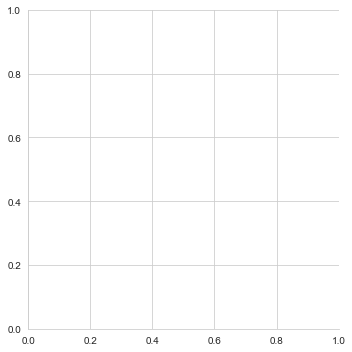

In [16]:
# Plot director and genre
sns.set_style('whitegrid')
sns.lmplot('director', 'genre', data=movies, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})